source: https://huggingface.co/blog/fine-tune-whisper

## 🤗 **Transformers** ашиглан олон хэлний **ASR**-д зориулсан **Whisper** загварыг хэргэжүүлэх.

Энэхүү Notebook-д Whisper загварыг хэрхэн нарийн тохируулаж сургах, хэргэжүүлэх талаар алхам алхмаар зааварчилах болно.
[Hugging Face](https://huggingface.co/) ашиглан олон хэлээр ярьдаг ASR загварыг хэргэжүүлэх болно.

## **Оршил**

Whisper бол [2022 оны есдүгээр сард](https://openai.com/blog/whisper/) зохиогч Алек Рэдфорд нарын гаргасан яриа таних автомат (ASR) загвар юм . OpenAI-аас. [Wav2Vec 2.0](https://arxiv.org/abs/2006.11477) гэх мэт **шошгогүй** аудио өгөгдөл дээр бэлтгэгдсэн олон хувилбараас ялгаатай нь Whisper маш их хэмжээний **шошготой** аудио транскрипцийн өгөгдөлд урьдчилан бэлтгэгдсэн байдаг. Нарийн хэлэхэд нийт 680,000 цагийн өгөгдөл байдгийн 117,000 цаг нь олон хэлний ASR өгөгдөл юм. Энэ нь Wav2Vec 2.0 (60,000 цаг)-г сургахад ашигладаг шошгогүй аудио өгөгдлөөс илүү их хэмжээний өгөгдөл юм. Үүний үр дүнд 96 гаруй хэл дээр ашиглах боломжтой checkpoint-ууд бий болж, тэдгээрийн ихэнх хэл нь бага өгөгдөлтэй.

Whisper-ийн сургасан загвар нь LibriSpeech ASR-ийн туршилтын цэвэр датан дээр бараг 3%-ийн үгийн алдааны түвшинтэй (WER) ажилдаг. Сургалтын үеэр олж авсан олон хэлний ASR-ийн мэдлэгийг бусад бага нөөцтэй хэлүүдэд ашиглах боломжтой. Нарийн тохируулга хийснээр урьдчилан бэлтгэгдсэн checkpoint-ууд тодорхой өгөгдлийн багц болон хэлэнд тохируулан эдгээр үр дүнг улам сайжруулах боломжтой.


<figure>
<img src="https://raw.githubusercontent.com/sanchit-gandhi/notebooks/main/whisper_architecture.svg" alt="Trulli" style="width:95%">
<figcaption align = "center"><b>Зураг 1:</b> Whisperpp загвар. Архитектур нь трансформатор дээр суурилсан кодлогч-декодерын стандарт загварыг дагаж мөрддөг. Лог-Мел спектрограмм нь кодлогч руу ордог. Сүүлийн кодлогчийн далд төлөвүүд нь хөндлөнгийн анхаарлын механизмаар дамжуулан декодерт ордог. Декодер нь кодлогчийн hidden layer болон өмнө нь урьдчилан таамаглаж байсан токенуудаас хамааруулан бичвэрийн токенуудыг авторегрессив байдлаар урьдчилан таамагладаг. Зургийн эх сурвалж:
<a href="https://openai.com/blog/whisper/">OpenAI Whisper Blog</a>.</figcaption>
</figure>

Whisper checkpoint-ууд нь янз бүрийн хэмжээтэй таван загварын тохиргоотой байдаг.
Хамгийн бага дөрвийг зөвхөн англи хэлээр эсвэл олон хэлээр ярьдаг өгөгдөл дээр сургадаг.
Хамгийн том checkpoint нь зөвхөн олон хэлээр ажилладаг. Урьдчилан бэлтгэгдсэн checkpoint-ууд бүгд
[Hugging Face](https://huggingface.co/models?search=openai/whisper) дээр байдаг. Hub дээрх загваруудын холбоосын хамт дараах хүснэгтэд нэгтгэн харуулав.

| Size   | Layers | Width | Heads | Parameters | English-only                                         | Multilingual                                      |
|--------|--------|-------|-------|------------|------------------------------------------------------|---------------------------------------------------|
| tiny   | 4      | 384   | 6     | 39 M       | [✓](https://huggingface.co/openai/whisper-tiny.en)   | [✓](https://huggingface.co/openai/whisper-tiny.)  |
| base   | 6      | 512   | 8     | 74 M       | [✓](https://huggingface.co/openai/whisper-base.en)   | [✓](https://huggingface.co/openai/whisper-base)   |
| small  | 12     | 768   | 12    | 244 M      | [✓](https://huggingface.co/openai/whisper-small.en)  | [✓](https://huggingface.co/openai/whisper-small)  |
| medium | 24     | 1024  | 16    | 769 M      | [✓](https://huggingface.co/openai/whisper-medium.en) | [✓](https://huggingface.co/openai/whisper-medium) |
| large  | 32     | 1280  | 20    | 1550 M     | x                                                    | [✓](https://huggingface.co/openai/whisper-large)  |

Энэхүү notebook-д Монгол хэл дээр ажиллах загварыг хэргэжүүлнэ.
[`"small"`](https://huggingface.co/openai/whisper-small) checkpoint нь 244 сая параметртэй (~= 1 ГБ).

Ашигдах датасэт нь [Common Voice](https://huggingface.co/datasets/mozilla-foundation/common_voice_11_0).

------------------------------------------------------------------------

Whisper гэдэг нэр нь **"Web-scale Supervised Pre-training for Speech Recognition"** гэсэн утгатай **"WSPSR"** гэсэн товчлолоос гаралтай.

## **Програмын орчинг бэлтгэх** 

Whisper загварыг тохируулахын тулд хэд хэдэн алдартай Python багцуудыг ашиглах болно. 

`datasets` сургалтын өгөгдлөө татаж авах, бэлтгэх.

`transformers` ,`accelerate`-ийг загвараа ачаалах, сургахад ашиглах. 

`soundfile` багцаас аудио файлуудыг урьдчилан боловсруулах. 

`evaluate` болон `jiwer`-ээр загварынхаа гүйцэтгэлийг үнэлэх.

`tensorboard`-оор хэмжигдэхүүнээ харах. 

`gradio` загварынхаа ажиллагааны үр дүнг харах болно.


In [2]:
# ! pip install datasets>=2.6.1
# ! pip install git+https://github.com/huggingface/transformers
# ! pip install librosa
# ! pip install evaluate>=0.30
# ! pip install jiwer
# ! pip install gradio

Загварын checkpoint-ийг [Hugging Face](https://huggingface.co/) руу шууд оруулах хэрэгтэй. Сургах явцад Hub нь:
- Нэгдсэн хувилбарын хяналт: Сургалтын явцад загварын checkpoint алга болохгүй.
- Tensorboard бүртгэл: Сургалтын явцад чухал хэмжүүрүүдийг хянах.
- Model cards: Загвар юу хийдэг, түүнийг ашиглахад зориулагдсан тохиолдлуудыг баримтжуулна.
- Community: Олон нийттэй хуваалцах, хамтран ажиллах хялбар арга!

Notebook-ийг Hub-тай холбох нь маш энгийн бөгөөд Hub баталгаажуулалтын токеныг оруулахад л хангалттай. Hub баталгаажуулалтын токеныг [эндээс](https://huggingface.co/settings/tokens): олно уу :

In [1]:
from huggingface_hub import notebook_login

notebook_login()

## **Load Dataset**

🤗 Датасет ашиглах, өгөгдөл татаж авах, бэлтгэх нь маш энгийн. Common Voice өгөгдлийг хялбархан татаж аваад бэлтгэх боломжтой.

Эхлээд Hugging Face ашиглалтын нөхцөлийг зөвшөөрсөн эсэхээ шалга: [mozilla-foundation/common_voice_11_0](https://huggingface.co/datasets/mozilla-foundation/common_voice_11_0). Нөхцөлүүдийг хүлээн зөвшөөрсний дараа өгөгдлийн багцад бүрэн хандах боломжтой бөгөөд өгөгдлийг дотооддоо татаж авах боломжтой болно.

Common Voice 11.0 нь ойролцоогоор 10 цагийн шошготой Монгол өгөгдлийг агуулдаг.

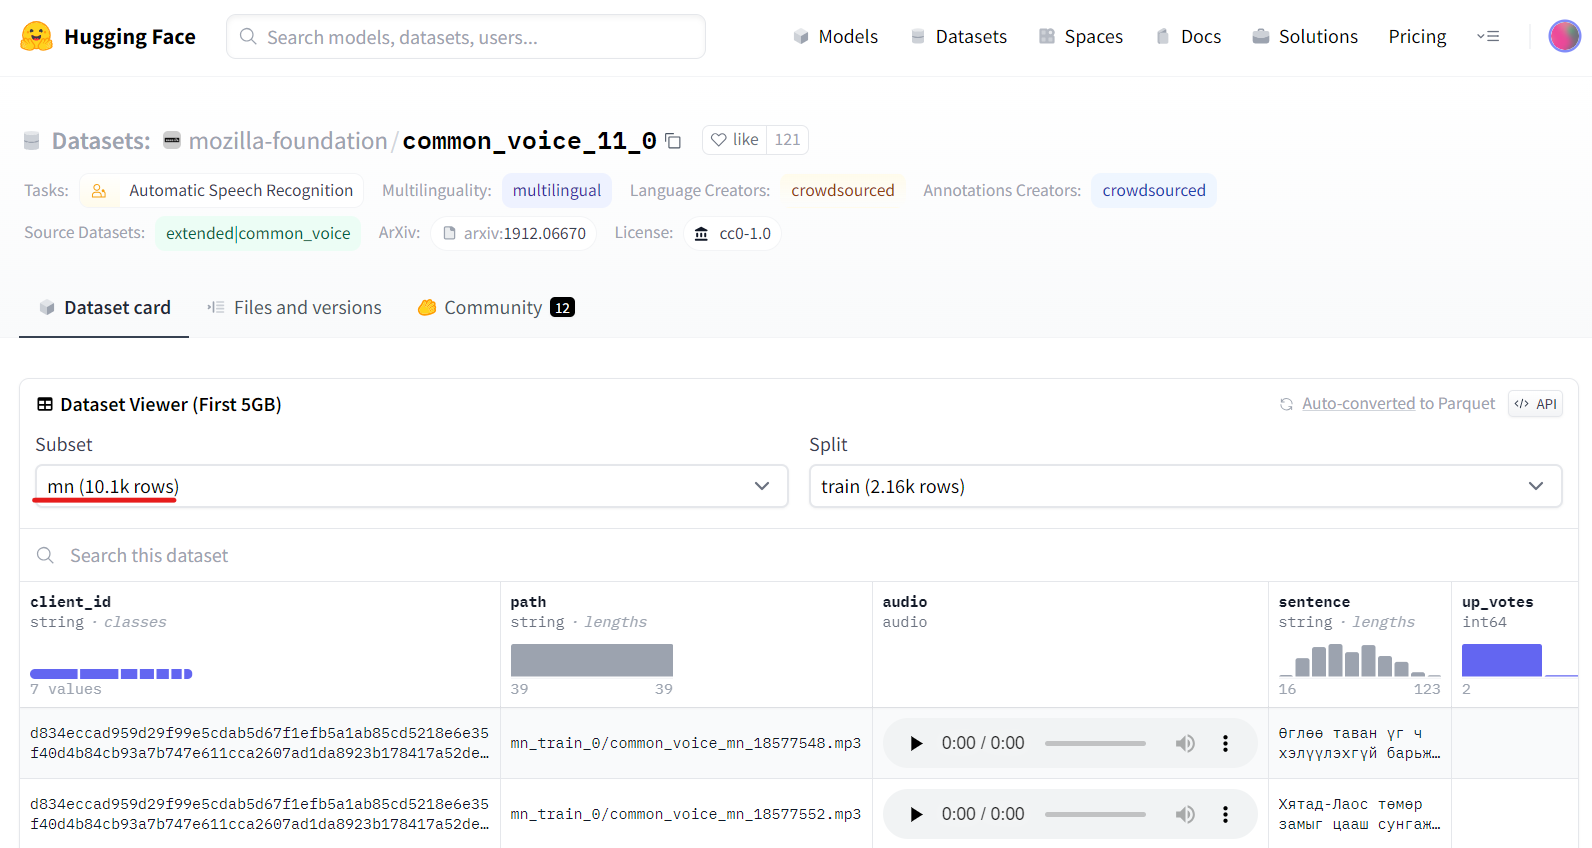

In [3]:
from datasets import load_dataset, DatasetDict

common_voice = DatasetDict()

common_voice["train"] = load_dataset("mozilla-foundation/common_voice_11_0", "mn", split="train+validation", use_auth_token=True)
common_voice["test"] = load_dataset("mozilla-foundation/common_voice_11_0", "mn", split="test", use_auth_token=True)

print(common_voice)

Generating train split: 0 examples [00:00, ? examples/s]

Reading metadata...: 2160it [00:00, 93915.96it/s]


Generating validation split: 0 examples [00:00, ? examples/s]

Reading metadata...: 1859it [00:00, 103294.84it/s]


Generating test split: 0 examples [00:00, ? examples/s]

Reading metadata...: 1886it [00:00, 89831.33it/s]


Generating other split: 0 examples [00:00, ? examples/s]

Reading metadata...: 3444it [00:00, 107615.96it/s]


Generating invalidated split: 0 examples [00:00, ? examples/s]

Reading metadata...: 755it [00:00, 50363.40it/s]
c:\Users\Oggy\anaconda3\Lib\site-packages\datasets\load.py:2087: FutureWarning: 'use_auth_token' was deprecated in favor of 'token' in version 2.14.0 and will be removed in 3.0.0.
You can remove this warning by passing 'token=<use_auth_token>' instead.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 4019
    })
    test: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 1886
    })
})


Ихэнх ASR өгөгдлийн багц нь зөвхөн оролтын дуу `(audio)` болон харгалзах текстийг `(sentence)` өгдөг. Common Voice нь `accent` гэх мэт нэмэлт мета өгөгдлийн мэдээллийг агуулдаг. Зөвхөн оруулах аудио болон текстийг үлдээгээд бусад баганыг хасах хэрэгтэй.

In [4]:
common_voice = common_voice.remove_columns(["accent", "age", "client_id", "down_votes", "gender", "locale", "path", "segment", "up_votes"])

print(common_voice)

DatasetDict({
    train: Dataset({
        features: ['audio', 'sentence'],
        num_rows: 4019
    })
    test: Dataset({
        features: ['audio', 'sentence'],
        num_rows: 1886
    })
})


## **Prepare Feature Extractor, Tokenizer and Data**

ASR-ийн pipeline-ийг гурван үе шатанд хувааж болно.
1) Аудио оролтыг урьдчилан боловсруулдаг **feature extractor**
2) **sequence-to-sequence mapping** хийх загвар.
3) Загварын гаралтыг текст формат руу боловсруулдаг токенизатор

🤗 Transformers-ийн Whisper загвар нь [WhisperFeatureExtractor](https://huggingface.co/docs/transformers/main/model_doc/whisper#transformers.WhisperFeatureExtractor)
болон [WhisperTokenizer](https://huggingface.co/docs/transformers/main/model_doc/whisper#transformers.WhisperTokenizer) гэж нэрлэгддэг задлагч болон токенизатортой.

### **WhisperFeatureExtractor()**

Яриа нь цаг хугацааны хувьд өөрчлөгддөг 1 хэмжээст массиваар илэрхийлэгддэг. Тухайн үеийн аль ч алхам дахь массивын утга нь тухайн цэг дэх дохионы далайц юм. Зөвхөн далайцын мэдээллээс л бид аудионы давтамжийн спектрийг сэргээж, бүх акустик шинж чанарыг сэргээж чадна.

Яриа тасралтгүй байдаг тул хязгааргүй олон далайцын утгыг агуулдаг. Энэ нь хязгаарлагдмал массивыг хүлээж буй компьютерийн төхөөрөмжүүдэд асуудал үүсгэдэг. Тиймээс бид тогтсон хугацааны алхамаар дохионоос утгыг түүвэрлэн ярианы дохиогоо ялгадаг. Бидний аудиог түүвэрлэх интервалыг түүвэрлэлтийн хурд гэж нэрлэдэг бөгөөд ихэвчлэн samples/sec эсвэл Герц (Гц) -ээр хэмжигддэг . Илүү өндөр түүвэрлэлтийн хурдаар түүвэрлэх нь тасралтгүй ярианы дохиог илүү сайн ойртуулдаг боловч секундэд илүү их утгыг хадгалах шаардлагатай болдог.

Янз бүрийн түүвэрлэлтийн хурдтай аудио дохио нь маш өөр тархалттай байдаг тул бид аудио оролтын түүвэрлэлтийн хурдыг загварынхаа хүлээгдэж буй түүвэрлэлтийн хурдтай тааруулах нь маш чухал юм. Аудио дээжийг зөвхөн зөв түүвэрлэлтийн хурдаар боловсруулах ёстой. Үүнийг хийхгүй байх нь гэнэтийн үр дүнд хүргэж болзошгүй юм! Жишээлбэл, 16 кГц давтамжтай дууны дээж авч, 8 кГц давтамжтайгаар сонсох нь аудио дууг хагас хурдтай мэт болгоно. Үүнтэй адилаар дууг буруу түүвэрлэлтийн хурдаар дамжуулах нь нэг түүврийн хурдыг хүлээж, нөгөөг хүлээн авах ASR загварыг гацааж болзошгүй юм. Whisper Feature Extractor нь 16 кГц-ийн түүвэрлэлтийн хурдтай аудио оролтыг хүлээж байгаа тул бид оролтыг энэ утгатай тааруулах хэрэгтэй.

Whisper Feature Extractor нь хоёр үйлдлийг гүйцэтгэдэг. 

1. Энэ нь эхлээд бүх түүврийн оролтын урт нь 30 секунд байхаар дууны түүврийн багцыг дүүргэгдсэн/таслагдсан өгдөг. 30-аас богино дээжийг дарааллын төгсгөлд тэг нэмэх замаар 30 секунд хүртэл дүүргэнэ (сигнал байхгүй эсвэл чимээгүй байх үед тохирох аудио дохионы утгыг тэг болгоно). 30-аас дээш урттай дээжийг 30 болгож багасгасан. Багцын бүх элементүүд нь оролтын зайд хамгийн их урттай байхаар дүүргэгдсэн/таслагдсан байдаг тул бид Whisper загвар руу аудио оролтыг дамжуулахад анхаарал тавих шаардлагагүй.

2. Whisper Feature Extractor гүйцэтгэдэг хоёр дахь үйлдэл нь дүүрэгсэн аудио массивыг log-Mel спектрограмм болгон хувиргах явдал юм. Эдгээр спектрограммууд нь Фурье хувиргалттай адил дохионы давтамжийн дүрслэл юм. Жишээ спектрограммыг Зураг 2-д үзүүлэв.

y-тэнхлэг нь тодорхой давтамжид тохирох Мел сувгууд юм.

x- тэнхлэг нь хугацаа. 

Пиксел бүрийн өнгө нь тухайн үеийн давтамжийн bin лог-эрчимтэй тохирч байна. Лог-Мел спектрограмм нь Whisper загварт хүлээгдэж буй оролтын хэлбэр юм. Аудио оролтыг _log-Mel spectrogram_ оролтын функцууд, дууны дүрслэл болон Whisper загвараас хүлээгдэж буй оролтын хэлбэр болгон хувиргадаг.

Мел сувгууд (frequency bins) нь яриа боловсруулахад стандарт бөгөөд хүний ​​сонсгох чадвартай төстэй. Whisper-ийг нарийн тааруулахын тулд спектрограм нь ярианы дохионы давтамжийн дүрслэлийг гаргах юм. Мел сувгийн талаар илүү дэлгэрэнгүйг [Mel-frequency cepstrum](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum)- аас үзнэ үү .



<figure>
<img src="https://huggingface.co/blog/assets/111_fine_tune_whisper/spectrogram.jpg" alt="Trulli" style="width:100%">
<figcaption align = "center"><b>Зураг 2:</b> Дээж авсан аудио массивыг log-Mel спектрограмм болгон хувиргах.
Зүүн талд: Түүвэрлэж авсан 1 хэмжээст аудио дохио. Баруун талд: харгалзах лог-Мел спектрограмм. Figure source:
<a href="https://ai.googleblog.com/2019/04/specaugment-new-data-augmentation.html">Google SpecAugment Blog</a>.
</figcaption>

урьдчилан бэлтгэгдсэн checkpoint Feature Extractor-ийг өгөгдмөл утгуудаар ачаална:

In [5]:
from transformers import WhisperFeatureExtractor

feature_extractor = WhisperFeatureExtractor.from_pretrained("openai/whisper-small")

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

### **WhisperTokenizer()**

Whisper загвар нь _токен id_ дарааллыг гаргадаг. Токенизатор нь эдгээр токен id тус бүрийг харгалзах текстийн мөрөнд буулгадаг.Аргументед нь урьдчилан тэлтгэсэн токенизатор болон хэл, хийх ажлын төрлийг зааж өнгө.

ASR-д кодлогчтой загваруудыг ашиглахдаа [Connectionist Temporal Classification](https://distill.pub/2017/ctc/) (CTC) ашиглан кодыг тайлдаг.  Ашигладаг өгөгдлийн багц бүрт CTC токенизаторыг сургах шаардлагатай. кодлогч-декодерийн архитектурыг ашиглахын нэг давуу тал нь токенизаторыг урьдчилан бэлтгэсэн загвараас шууд ашиглах боломжтой юм.

Whisper tokenizer нь сургалтын өмнөх 96 хэлний транскрипц дээр урьдчилан бэлтгэгдсэн байдаг. Иймээс энэ нь бараг бүх ASR програмуудад тохиромжтой өргөн байт хостой . 

In [6]:
from transformers import WhisperTokenizer

tokenizer = WhisperTokenizer.from_pretrained("openai/whisper-small", language="mongolian", task="transcribe")

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

**Зөвлөмж:** `translate` Энэ нь өгөгдлийн багцыг урьдчилан боловсруулах үед ярианы орчуулгад зориулсан холбогдох даалгавар болон хэлний токенуудыг өмнө нь тавина.

Common Voice өгөгдлийн багцын эхний жишээг кодлох, тайлах замаар токенизатор монгол хэлний тэмдэгтүүдийг зөв кодлодог эсэхийг бид шалгаж болно. Транскрипцийг кодлох үед токенизатор нь дарааллын эхлэл ба төгсгөлд "тусгай тэмдэгт"-ийг хавсаргаж, даалгаварын токенуудын эхлэл/төгсгөл, хэлний токен болон даалгаврын токенуудыг оруулдаг. Шошгоны id-н кодыг тайлахдаа бид эдгээр тусгай жетонуудыг "алсагалах" сонголттой бөгөөд энэ нь бидэнд мөрийг анхны оролтын хэлбэрээр буцаах боломжийг олгоно.

In [8]:
input_str = common_voice["train"][0]["sentence"]
labels = tokenizer(input_str).input_ids
decoded_with_special = tokenizer.decode(labels, skip_special_tokens=False)
decoded_str = tokenizer.decode(labels, skip_special_tokens=True)

print(f"Input:                 {input_str}")
print(f"Decoded w/ special:    {decoded_with_special}")
print(f"Decoded w/out special: {decoded_str}")
print(f"Are equal:             {input_str == decoded_str}")


Input:                 Өглөө таван үг ч хэлүүлэхгүй барьж идчих гээд байх чинь билээ.
Decoded w/ special:    <|startoftranscript|><|mn|><|transcribe|><|notimestamps|>Өглөө таван үг ч хэлүүлэхгүй барьж идчих гээд байх чинь билээ.<|endoftext|>
Decoded w/out special: Өглөө таван үг ч хэлүүлэхгүй барьж идчих гээд байх чинь билээ.
Are equal:             True


## **WhisperProcessor үүсгэх**

Feature Extractor болон Tokenizer ашиглахыг хялбарчлахын тулд хоёуланг нь нэг `WhisperProcessor` class-д оруулна.

In [8]:
from transformers import WhisperProcessor

processor = WhisperProcessor.from_pretrained("openai/whisper-small", language="mongolian", task="transcribe")

## **Өгөгдлийг бэлтгэх.**

**Common Voice** өгөгдлийн багцын эхний жишээг хэвлэж үзэцгээе.

In [9]:
print(common_voice["train"][0])

{'audio': {'path': 'C:\\Users\\Oggy\\.cache\\huggingface\\datasets\\downloads\\extracted\\fcdb59f90e5136f8767eac0f33d15eb27d3f47d112c0b6ab58eede7a3f0eae18\\mn_train_0/common_voice_mn_18577548.mp3', 'array': array([ 0.00000000e+00, -2.28557272e-15,  3.81128997e-15, ...,
       -5.73796115e-07, -4.21843765e-07,  3.44539103e-07]), 'sampling_rate': 48000}, 'sentence': 'Өглөө таван үг ч хэлүүлэхгүй барьж идчих гээд байх чинь билээ.'}


1 хэмжээст оролтын аудио массив болон харгалзах зорилтот транскрипцтэй болохыг харж болно. Оролтын дууг 48 кГц давтамжтайгаар түүвэрлэсэн байгааг мөн харж болно. Whisper feature extractor-руу дамжуулахаасаа өмнө түүврийг 16 кГц болгон багасгах хэрэгтэй .

`datasets` санг ашиглан аудио оролтыг зөв түүвэрлэлтийн хурдаар тохируулна.
[`cast_column`](https://huggingface.co/docs/datasets/package_reference/main_classes.html?highlight=cast_column#datasets.DatasetDict.cast_column)
арга. Энэ үйлдэл нь аудиог өөрчлөхгүй, харин аудионы түүврийг дахин түүвэрлэхийн тулд `datasets` руу дахин түүвэрлэх хурдыг дамжуулдаг.

In [10]:
from datasets import Audio
common_voice = common_voice.cast_column("audio", Audio(sampling_rate=16000))

In [11]:
print(common_voice["train"][0])

{'audio': {'path': 'C:\\Users\\Oggy\\.cache\\huggingface\\datasets\\downloads\\extracted\\fcdb59f90e5136f8767eac0f33d15eb27d3f47d112c0b6ab58eede7a3f0eae18\\mn_train_0/common_voice_mn_18577548.mp3', 'array': array([ 6.31279877e-15, -1.19300432e-14,  1.43735090e-14, ...,
        9.84842887e-07,  1.42577885e-06, -8.60155100e-08]), 'sampling_rate': 16000}, 'sentence': 'Өглөө таван үг ч хэлүүлэхгүй барьж идчих гээд байх чинь билээ.'}


Одоо өгөгдлийг загварт бэлэн болгох `prepare_dataset` функцийг бичиж болно:
1. `batch["audio"]` нь аудио өгөгдлийг ачаалж, дахин түүвэр авдаг. Дээр тайлбарласны дагуу 🤗 Datasets нь шаардлагатай дахин түүвэрлэлтийн үйлдлийг шууд гүйцэтгэдэг.
2. 1 хэмжээст аудио массиваас log-Mel спектрограмын оролтын функцуудыг тооцоолохын тулд Feature extractor-ийг ашигладаг.
3. токенизаторын тусламжтайгаар id-г шошголохын тулд транскрипцийг кодчилдог.

In [12]:
def prepare_dataset(batch):

    from transformers import WhisperFeatureExtractor
    from transformers import WhisperTokenizer

    tokenizer = WhisperTokenizer.from_pretrained("openai/whisper-small", language="mongolian", task="transcribe")
    feature_extractor = WhisperFeatureExtractor.from_pretrained("openai/whisper-small")

    # load and resample audio data from 48 to 16kHz
    audio = batch["audio"]

    # compute log-Mel input features from input audio array
    batch["input_features"] = feature_extractor(audio["array"], sampling_rate=audio["sampling_rate"]).input_features[0]

    # encode target text to label ids
    batch["labels"] = tokenizer(batch["sentence"]).input_ids
    return batch

`datasets` аргыг ашиглан бид бүх сургалтын жишээндээ өгөгдөл бэлтгэх функцийг ашиглаж болно `.map:`

 `num_proc` аргумент нь CPU-ний хэдэн цөм ашиглахыг зааж өгдөг. 
 
 `proc_proc` > 1-ийг тохируулснаар олон боловсруулалтыг идэвхжүүлнэ. Хэрэв `.map` арга нь олон боловсруулалттай гацсан бол `num_proc=1` гэж тохируулж, өгөгдлийн багцыг дараалан боловсруулна.

In [13]:
common_voice = common_voice.map(prepare_dataset, remove_columns=common_voice.column_names["train"], num_proc=4)

Map (num_proc=4):   0%|          | 0/4019 [00:00<?, ? examples/s]

## **Сургалт ба үнэлгээ**

[🤗Whisper trainer](https://huggingface.co/transformers/master/main_classes/trainer.html?highlight=trainer)-ийг ажлуулах.

- Data collecter-ийг тодорхойлох: Data collecter нь бидний урьдчилан боловсруулсан өгөгдлийг авч, загварт дамжуулдаг.

- Evaluation metrics: Үнэлгээний явцад [үгний алдааны түвшин (WER)](https://huggingface.co/metrics/wer) хэмжигдэхүүнийг ашиглан загварыг үнэлнэ. Энэ тооцооллыг зохицуулдаг `compute_meterics` функцийг тодорхойлох хэрэгтэй.

- Урьдчилан бэлтгэгдсэн checkpoint-ийг ачаалах: Урьдчилан бэлтгэгдсэн checkpoint-ийг ачаалж, сургалтанд зориулж зөв тохируулах хэрэгтэй.

- Trainer argument-ийг тодорхойлох: Үүнийг trainer сургалтын үйл ажиллагаанд ашиглана.

Загварыг тохируулсны дараа зөв бэлтгэсэн эсэхээ шалгахын тулд туршилтын өгөгдөл дээр буюу Монгол хэл дээрх яриаг хөрвүүлэж үнэлнэ.
.

### **Data Collator-ийг тодорхойлох**

**Sequence-to-sequence** ярианы загварт зориулсан Data collector нь "input_features" болон "label"-г тусад нь авна.

`input_features`-ыг 30 секунд болгон дүүргэж, лог-Мел спектрограмм болгон хувиргасан. Feature Extractor-ийн үйлдлээр тогтмол хэмжээстэй байх тул бидний хийх ёстой зүйл бол "input_feature"-ыг хөрвүүлэх явдал юм. Үүнийг feature extracor `.pad` аргыг `return_tensors=pt` ашиглан хийдэг.

`label` нь дүүргээгүй байгаа. Токенизаторын `.pad` аргыг ашиглан label дахь хамгийн уртын дарааллыг олно. Дараа нь нөхөх токенуудыг `-100`-оор сольж, алдагдлыг тооцоолохдоо эдгээр токенуудыг тооцохгүй.

Өмнө нь тодорхойлсон 'WhisperProcessor'-ыг ашиглан гүйцэтгэх боломжтой.

In [19]:
import torch

from dataclasses import dataclass
from typing import Any, Dict, List, Union

@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        # split inputs and labels since they have to be of different lengths and need different padding methods
        # first treat the audio inputs by simply returning torch tensors
        input_features = [{"input_features": feature["input_features"]} for feature in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")

        # get the tokenized label sequences
        label_features = [{"input_ids": feature["labels"]} for feature in features]
        # pad the labels to max length
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")

        # replace padding with -100 to ignore loss correctly
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)

        # if bos token is appended in previous tokenization step,
        # cut bos token here as it's append later anyways
        if (labels[:, 0] == self.processor.tokenizer.bos_token_id).all().cpu().item():
            labels = labels[:, 1:]

        batch["labels"] = labels

        return batch

Дээр тодорхойлсон Datacollector-ийг ажилуулах.

In [20]:
data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)

### **Evaluation Metrics**

Дараа нь үнэлгээний багцдаа ашиглах evaluate metrics-ийг тодорхойлно. ASR системийг үнэлэх Word Error Rate [WER](https://huggingface.co/metrics/wer) хэмжигдэхүүнийг ашиглана.

In [21]:
import evaluate

metric = evaluate.load("wer")

Дараа нь загварын таамаглалыг авч WER хэмжигдэхүүнийг буцаадаг функцийг тодорхойлох хэрэгтэй. `compute_metrics` гэж нэрлэгддэг. Энэ функц нь эхлээд `-100`-г `pad_token_id`-ээр солино. Loss тооцох үед дүүрэгсэн токенуудыг тооцохгүй болгохын тулд Data Collector дээр үйлдлийг буцаана. Дараа нь энэ нь таамагласан болон label id-г үг болгон тайлдаг. Эцэст нь, энэ нь таамаглал болон зөв label хооронд WER-ийг тооцоолдог.

In [22]:
def compute_metrics(pred):
    pred_ids = pred.predictions
    label_ids = pred.label_ids

    # replace -100 with the pad_token_id
    label_ids[label_ids == -100] = tokenizer.pad_token_id

    # we do not want to group tokens when computing the metrics
    pred_str = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
    label_str = tokenizer.batch_decode(label_ids, skip_special_tokens=True)

    wer = 100 * metric.compute(predictions=pred_str, references=label_str)

    return {"wer": wer}

### **Load a Pre-Trained Checkpoint**

Одоо урьдчилан бэлтгэсэн Whisper `small` checkpoint-ийг ачаалъя.

In [23]:
from transformers import WhisperForConditionalGeneration

model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small")

Whisper загвар нь авторегресс үүсгэхээс өмнө загварын гаралт болгон өгөх токен id-уудтай. [forced_decoder_ids](https://huggingface.co/docs/transformers/main_classes/text_generation#transformers.generation_utils.GenerationMixin.generate.forced_decoder_ids). Эдгээр токен id-ууд нь ASR-ийн транскрипцийн хэл болон даалгаврыг хянадаг. Загварыг зөв хэл (Монгол) болон даалгаврыг (transcription) таамаглахад сургах тул эдгээр id-г тохируулах ёстой. Үүсгэх явцад бүрэн дарагдсан токенууд бас байдаг. [suppress_tokens](https://huggingface.co/docs/transformers/main_classes/text_generation#transformers.generation_utils.GenerationMixin.generate.suppress_tokens). Эдгээр токенуудын бүртгэлийн магадлалыг `-inf` гэж тохируулсан тул хэзээ ч түүвэрлэлтэд авдаггүй. Эдгээр токенуудыг хоосон жагсаалт болгон хувиргана.


In [28]:
model.config.forced_decoder_ids = None
model.config.suppress_tokens = []

### **Define the Training Configuration**

Training хийхэд хэрэглэгдэх бүх параметрүүдийг тодорхойлох. [Seq2SeqTrainingArguments](https://huggingface.co/docs/transformers/main_classes/trainer#transformers.Seq2SeqTrainingArguments)

`output_dir`: Загварын жинг хадгалах зам. Энэ нь мөн [Hugging Face Hub](https://huggingface.co/) дээрх хадгалах газрын нэр байх болно .

`generation_max_length`: Үнэлгээний явцад авторегрессив үүсгэх токенуудын хамгийн уртыг токенийн тоо.

`save_steps`: Сургалтын явцад завсрын checkpoint-уудыг хадгалагдаж, сургалтын алхам бүрийг Hub-д асинхрон байдлаар байршуулна.

`eval_steps`: Сургалтын явцад завсрын checkpoint-уудийн үнэлгээг сургалтын үе шат бүрд хийнэ.

`report_to`: Сургалтын бүртгэлийг хаана хадгалах вэ. Дэмжигдсэн платформууд нь "azure_ml", "comet_ml", "mlflow", "neptune", "tensorboard"болон "wandb".

In [31]:
from transformers import Seq2SeqTrainingArguments

whisper_size = 'small'
lan = 'mongolian'
version = 1
output_dir = f"whisper-{whisper_size}-{lan}-{version}"
training_args = Seq2SeqTrainingArguments(
    output_dir=output_dir,  # change to a repo name of your choice
    per_device_train_batch_size=16,
    gradient_accumulation_steps=1,  # increase by 2x for every 2x decrease in batch size
    learning_rate=1e-5,
    warmup_steps=500,
    max_steps=4000,
    gradient_checkpointing=True,
    fp16=False,
    evaluation_strategy="steps",
    per_device_eval_batch_size=8,
    predict_with_generate=True,
    generation_max_length=225,
    save_steps=1000,
    eval_steps=1000,
    logging_steps=25,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    metric_for_best_model="wer",
    greater_is_better=False,
    push_to_hub=False,
)

**Note**: Checkpoint-ийг Hub-д байршуулахыг хүсэхгүй байгаа бол,`push_to_hub=False`-г тохируулна уу.

Сургалтын аргументуудыг загварын хамт trainer-луу дамжуулна.
`dataset`, `datacollector`, `compute_metrics`

In [32]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=common_voice["train"],
    eval_dataset=common_voice["test"],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    tokenizer=processor.feature_extractor,
)

Сургалт эхлэхээс өмнө процессорын объектыг нэг удаа хадгалах болно. Процессорыг сургах боломжгүй тул сургалтын явцад өөрчлөгдөхгүй.

In [33]:
processor.save_pretrained(training_args.output_dir)

### Training

Сургалт нь GPU болон CPU-с хамааран ойролцоогоор 5-10 цаг үргэлжилнэ. GPU-ээс хамааран та сургалт эхлэх үед CUDA `out-of-memory` алдаатай зааж магадгүй. Энэ тохиолдолд `per_device_train_batch_size`-ээр өгөгдлийг 2 дахин бууруулах хэрэгтэй. [gradient_accumulation_steps]((https://huggingface.co/docs/transformers/main_classes/trainer#transformers.Seq2SeqTrainingArguments.gradient_ackumulation_steps) )


In [ ]:
trainer.train()

Тохирох түлхүүр үгийн аргументуудыг (kwargs) тохируулснаар checkpoint-оо [`hf-speech-bench`](https://huggingface.co/spaces/huggingface/hf-speech-bench) руу илгээж болно. Эдгээр утгыг өгөгдөл, хэл болон загварын нэрэндээ тохируулан өөрчилж болно.

In [ ]:
kwargs = {
    "dataset_tags": "mozilla-foundation/common_voice_11_0",
    "dataset": "Common Voice 11.0",  # a 'pretty' name for the training dataset
    "dataset_args": "config: mn, split: test",
    "language": "mongolian",
    "model_name": "Whisper Small MN - Otgonbaatar",  # a 'pretty' name for our model
    "finetuned_from": "openai/whisper-small",
    "tasks": "automatic-speech-recognition",
    "tags": "hf-asr-leaderboard",
}

Сургалтын үр дүнг одоо Hub-д байршуулах боломжтой. Үүнийг хийхийн тулд `push_to_hub` командыг ажиллуулна.

In [ ]:
trainer.push_to_hub(**kwargs)

Hub дээрх холбоосыг ашиглан энэ загварыг хэн нэгэнтэй хуваалцах боломжтой. холбоос нь `your-username/the-name-you-picked`

In [ ]:
from transformers import WhisperForConditionalGeneration, WhisperProcessor

model = WhisperForConditionalGeneration.from_pretrained("Ogtonbaatar/whisper-small-mn")
processor = WhisperProcessor.from_pretrained("Otgonbaatar/whisper-small-mn")


## **Building a Demo**

#### **Base model татаж авах.**

In [4]:
import whisper

model = whisper.load_model("base",download_root='D:/This_season/Tusul/editing_projects/whisper-multiple-hf-datasets-main/model/')

#### **Wisper-д байгаа монгол хэл-д сургасан модел.**

In [3]:
# Use a pipeline as a high-level helper
from transformers import pipeline
import torch

#pipe = pipeline("automatic-speech-recognition", model="bayartsogt/whisper-large-v2-mn-13")
pipe = pipeline("automatic-speech-recognition", model="bayartsogt/whisper-tiny-mn-9")
torch.save(pipe, 'D:/This_season/Tusul/editing_projects/whisper-multiple-hf-datasets-main/model/whisper-tiny-mn-9.pt')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
import torch
torch.save(pipe, 'D:/This_season/Tusul/editing_projects/whisper-multiple-hf-datasets-main/model/wishper-large-v2-mn-13.pt')

### **Speech-to-Text** моделыг ачааллах. 

##### Gradio ашигдан хэргэжүүлэх.

In [5]:
from transformers import pipeline
import gradio as gr
import torch
#pipe = pipeline(model="bayartsogt/whisper-small-mn-12")  # change to "your-username/the-name-you-picked"
pipe = torch.load('D:/This_season/Tusul/editing_projects/whisper-multiple-hf-datasets-main/model/wishper-small-v12-mn.pt')
def transcribe(audio):
    text = pipe(audio)["text"]
    return text

iface = gr.Interface(
    fn=transcribe,
    inputs=gr.Audio(sources='microphone', type="numpy", streaming=True),
    outputs="text",
    title="Whisper Small Mongolian",
    description="Realtime demo for Mongolian speech recognition using a fine-tuned Whisper small model.",
)

iface.launch()

Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


##### **Дуу хоолойг бичиж бичвэрлүү хөрвүүлэх 1.**

In [2]:
#! pip install pvrecorder
import librosa
from pvrecorder import PvRecorder
import wave
import struct
import IPython.display as ipd
recorder = PvRecorder(device_index=-1, frame_length=512)
sr = 16000
audio = []

c:\Users\Oggy\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
try:
    recorder.start()
    print('Start recording...')
    while True:
        frame = recorder.read()
        audio.extend(frame)
except KeyboardInterrupt:
    recorder.stop()
    print('Finish recorded')
    with wave.open('./test_audios/recorded_audio.wav', 'w') as f:
        f.setparams((1, 2, 16000, 512, "NONE", "NONE"))
        f.writeframes(struct.pack("h" * len(audio), *audio))
finally:
    audio, sr = librosa.load('./test_audios/recorded_audio.wav',sr=sr)
    recorder.delete()

Start recording...
Finish recorded


In [ ]:
ipd.display(ipd.Audio(data=audio, rate=sr))
print(model(audio)["text"])

##### **Дуу хоолойг бичиж бичвэрлүү хөрвүүлэх 2.**

In [1]:
import torch
import sounddevice as sd
import IPython.display as ipd
import librosa
model = torch.load('D:/This_season/Tusul/editing_projects/whisper-multiple-hf-datasets-main/model/wishper-small-v12-mn.pt')

c:\Users\Oggy\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
duration = 5.0
sample_rate = 16000

print('-'*40 + '\n' + "Дуу хоолой бичиж байна. %0.1fs ..." % duration)
recorded_audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, blocking=True)
print("Дуу хоолойг бичиж дууслаа." + '\n' + '-'*40)

print('Аудиог бичвэрлүү хөрвүүлэж байна...')
text = model(recorded_audio[:,0])["text"]
print('Predicted text: ' + '\x1b[6;30;42m' + text + '\x1b[0m' + '\n' + '-'*(len(text)+17))

ipd.display(ipd.Audio(data=recorded_audio[:,0], rate=sample_rate))

----------------------------------------
Дуу хоолой бичиж байна. 5.0s ...
Дуу хоолойг бичиж дууслаа.
----------------------------------------
Аудиог бичвэрлүү хөрвүүлэж байна...
Predicted text: сайн байна уу намайг отгон баатар гэдэг би монгол улсын их сургуульд сурдаг
--------------------------------------------------------------------------------------------



### Хавсаргалт
- `Source code` https://huggingface.co/blog/fine-tune-whisper
- `pretrained model:` https://huggingface.co/bayartsogt